## TP: Optimisation

November, 2022


# Table of contents
1. [Exercises](#part1)
    - [Exercise 1](#part1sec1)
    - [Exercise 2](#part1sec2)
    - [Exercise 3](#part1sec3)
    - [Bonus](#part1sec4)


# Exercises <a id="part1"></a>
## Exercise 1 <a id="part1sec1"></a>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_contour(Q, c):
    """
    Plot the contour of a quadratic function 1/2 x^T Q x + c^T x.
    
    Input:
        - Q: a 2x2 numpy array.
        - c: a numpy array of size 2.
    """
    f = lambda x: x.T.dot(Q.dot(x))/2 + c.dot(x)
    sol = np.linalg.solve(Q, -c)
    sol_x, sol_y = sol[0], sol[1]

    X, Y = np.meshgrid(np.linspace(-10+sol_x, 10+sol_x, 100), np.linspace(-10+sol_y, 10+sol_y, 100))
    X, Y = X.ravel(), Y.ravel()
    Z = np.asarray([f(np.r_[x, y]) for x, y in zip(X, Y)])

    X.shape = (int(np.sqrt(X.size)), -1)
    Y.shape = (int(np.sqrt(Y.size)), -1)
    Z.shape = (int(np.sqrt(Z.size)), -1)

    levels = np.logspace(0, np.log10(Z.max()-Z.min()), 20) + Z.min()
    plt.contour(X, Y, Z, levels)

def plot_path(p):
    """
    Plot the path [x_0, x_1, … x_k] of an optimization algorithm.
    
    Input:
        - p: a list of numpy arrays of size 2 (the points x_t, t \in [0, k]).
    """
    plt.plot([x for x, y in p], [y for x, y in p], '*-')

>Let us consider the optimization problem:
$$
    \operatorname{minimize}_{x \in \mathbb R ^d}
    \frac 1 2 x^\top Q x + c^\top x,
$$
where $Q$ is a symmetric positive definite matrix and $c$ a vector.
These parameters can be randomly generated (here in dimension 2):

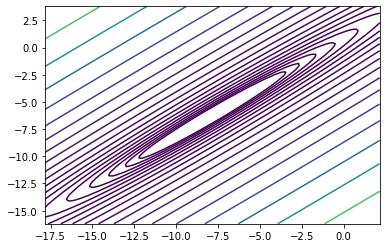

In [ ]:
Q = np.random.randn(2, 2)
Q = Q.dot(Q.T)
c = np.random.randn(2)
c *= 10 / np.linalg.norm(np.linalg.solve(Q, -c))

plot_contour(Q, c)

>**Question 1.**
Define a function `gradient_descent(Q, c, eps=1e-3)` that:
- performs a gradient descent for the optimization problem of interest with fixed step size;
- terminates when the norm of the current gradient is less than `eps`;
- returns the list of iterates $(x_k)_k$.

>Plot the path of the descent.

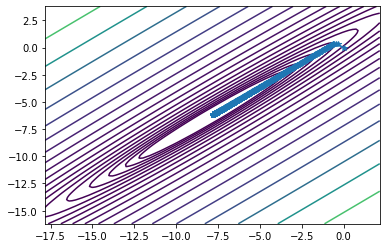

In [ ]:
# Answer  

def gradient_descent(Q, c, eps=1e-3, t= 0.1):
    
    gradient= lambda x : Q.dot(x)+c
    
    x = np.zeros(len(Q))
    y=gradient(x)
    v=[x]
    maxit=10000
    n=0
    
    while(np.linalg.norm(y)>=eps and n < maxit):
        x = x-t*gradient(x)
        y=gradient(x)
        v.append(x)
        n+=1
    return v
z=gradient_descent(Q, c)
plot_contour(Q,c)
plot_path(z)


>**Question 2.**
Let $L$ be the coefficient of Lipschitz-continuity of the gradient of the objective function.Try different step sizes between $\frac{0.1}{L}$ and $\frac{2.5}{L}$.
What do you observe?

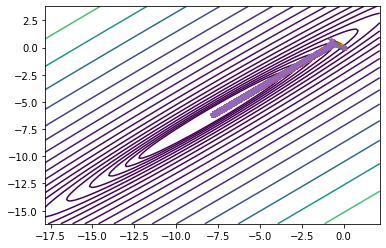

In [ ]:
# Answer

L=max(np.linalg.eigvals(Q))

seq=np.linspace(0.1/L, 1.5/L, 5)
plot_contour(Q,c)
for s in seq:
    plot_path(gradient_descent(Q, c, t=s))


>**Question 3.**
Implement a line search with Armijo's rule and compare the path obtained.

In [ ]:
# Answer

def graddesc_armijorule(Q, c, eps = 1e-3):
    t = 1
    beta = 0.5
    alpha = 0.4
    maxit = 1000000
    x = np.random.randn(len(Q))
    v = [x]
    
    f = lambda x: x.T.dot(Q.dot(x))/2 + c.dot(x)
    gradient = lambda x : Q.dot(x)+c
    
    n = 0
    
    while np.linalg.norm(gradient(x)) >= eps and n <= maxit:
        
        r0 = np.dot(gradient(x), -gradient(x))
        r = f(x - t * gradient(x))
        while not r <= f(x) + alpha * beta * r0 :
            r = f(x - alpha * gradient(x))
            t = beta * t
        
        x = x - alpha * gradient(x)
        y = gradient(x)
        v.append(x)
        
        n += 1
        
    return v

z =graddesc_armijorule(Q, c)
print(len(z))
plot_contour(Q, c)
plot_path(z)

>**Question 4.**
Show that the exact line search boils down to $\gamma_k = \frac{\|v_k\|_2^2}{v_k^\top Q v_k}$, where $v_k$ is the gradient of the objective function at $x_k$.

>Implement a gradient descent with this step size and compare to both others.

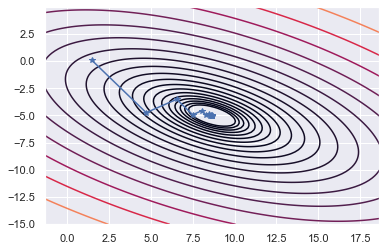

In [ ]:
# Answer

def gradient_descent1(Q, c, eps = 1e-3):
        
    maxit = 10000000
    x = np.random.randn(len(Q))
    y = gradient(x)
    v = [x]
    
    f = lambda x: x.T.dot(Q.dot(x))/2 + c.dot(x)
    gradient = lambda x : Q.dot(x)+c
    
    n = 0
    
    while np.linalg.norm(gradient(x)) >= eps and n <= maxit :
    
        t = np.linalg.norm(gradient(x))**2/ (gradient(x).T.dot(Q.dot(gradient(x))))
        x = x - t * gradient(x)
        y = gradient(x)
        v.append(x)
        
        n += 1    
        
    return v

z = gradient_descent1(Q, c)

plot_contour(Q, c)
plot_path(z)

>**Question 5.**
Compare with a Newton method.

In [ ]:
# Answer

def newton_method(Q, c, eps = 1e-3):
    
    t = 0.0001
    maxit = 1000000
    x = np.random.randn(len(Q))
    y = gradient(x)
    v = [x]
    
    gradient = lambda x : Q.dot(x)+c
    
    n = 0
    while np.linalg.norm(gradient(x)) >= eps and n < maxit:
        
    
        x = x - t * np.linalg.inv(Q).dot(gradient(x))
        y = gradient(x)
        v.append(x)
        
        n += 1
    
    
    return v

z = newton_method(Q, c)

plot_contour(Q, c)
plot_path(z)

## Exercise 2 <a id="part1sec2"></a>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

>Let us consider the lasso problem:
$$
    \operatorname{minimize}_{x \in \mathbb R ^d}
    \frac{1}{2} \left\|Ax  - y\right\|_2 + \lambda \left\|x\right\|_1,
$$
where $y \in \mathbb R^n$ and $A \in \mathbb R^{n \times d}$.

>The matrices $A$ and $b$ can be randomly generated:

In [ ]:
n, d = 200, 2  # Sample size, dimension

A = np.random.randn(n, d-1)
A = np.concatenate((A, np.ones((n, 1))), axis=1)  # Last column of 1 (intercept)

x_true = np.random.randn(d)

y = A.dot(x_true) + np.random.randn(n)*5e-1

>**Question 1.**
Define a function `lasso(A, b, lamb, maxiter)` that return the minimizer $x^\star$ with the **Proximal gradient algorithm**

In [ ]:
# Answer
def S(v, theta):
    if v >= theta:
        return v-theta
    elif v <= -theta:
        return v+theta
    else:
        return 0   

def S_v(v, theta):
    s = []
    for i in v:
        s.append(S(i, theta))
    return s

def lasso(A, y, lamb, maxiter):
    
    x = np.zeros(len(A))
    theta = 1/np.linalg.norm(np.dot(A,A.T))
    n=0
    while n < maxiter:
        gradient = lambda x : A.T.dot(A.dot(x)-y)
        x = S_v(x - lamb * gradient(x), theta*lamb)

    n+=1
    return x

lasso(A,y, 2, 100)

>**Question 2.**
Compare the estimated $\hat{x}$ with different values of $\lambda$ w.r.t to the true $x^\star$

In [ ]:
#Answer
L = np.linspace(0, 1/np.linalg.norm(np.dot(A,A.T)), 5)

for lamb in L:
    xlamb = lasso(A, y, lamb, maxiter=100)
    
    error = np.linalg.norm(xlamb - x_true)
    print(error)

## Exercise 3 <a id="part1sec3"></a>


>Let us consider the basic pursuit problem:
$$
    \operatorname{minimize}_{x \in \mathbb R ^d}
    \left\|x \right\|_1, \text{ subject to  } y = Ax
$$
where $y \in \mathbb R^n$ and $A \in \mathbb R^{n \times d}$.

>The matrices $A$ and $b$ can be randomly generated:

>**Question 1.**
Define a function `least_l1_pen(A, b)` that return the minimizer $x^\star$ with the **ADMM algorithm**

In [ ]:
# Answer

def least_l1_pen(A,y):
    x = np.zeros(2)
    z = np.zeros(2)
    u = np.zeros(2)
    maxiter=50
    theta = 1/np.linalg.norm(np.dot(A,A.T))
    I = np.eye(2)
    #P = numpy.linalg.inv(A.dot(A.T))
    #R = I-A.T.dot(P).dot(A)      
    n = 0
    while (n < maxiter):
        x = I-A.T.dot(np.linalg.inv(A.dot(A.T))).dot(A).dot(z-u) + A.T.dot(np.linalg.inv(A.dot(A.T))).y
        z = S_v(x+u, theta)
        u = u + x - z

        n+=1
    
    return x

x=least_l1_pen(A,y)
x

>**Question 2.**
Compare the estimated $\hat{x}$ with different values of $\lambda$ w.r.t to the true $x^\star$

In [ ]:
#Answer

L = np.linspace(0, 1/np.linalg.norm(np.dot(A,A.T)), 5)

for lamb in L:
    xlamb = least_l1_pen(A, y)
    
    error = np.linalg.norm(xlamb - x_true)
    print(error)

## Bonus. <a id="part1sec4"></a>

>Let us consider the problem of least absolute deviations:
$$
    \operatorname{minimize}_{\beta \in \mathbb R ^d}
    \left\| Y - X\beta \right\|_1,
$$
where $Y \in \mathbb R^n$ and $X \in \mathbb R^{n \times d}$.

>The matrices $X$ and $Y$ can be randomly generated:

In [ ]:
n, d = 200, 2  # Sample size, dimension

X = np.random.randn(n, d-1)
X = np.concatenate((X, np.ones((n, 1))), axis=1)  # Last column of 1 (intercept)

beta = np.random.randn(d)
# beta[1:-1] = 0  # Only the first and the last components are nonzero

Y = X.dot(beta) + np.random.randn(n)*5e-1
obj_sol = np.linalg.norm(Y - X.dot(beta), ord=1)

>**Question 1.**
Define a function `subgradient_descent(Y, X, n_it=100, step=1., mode='fixed')` that:
- performs a subgradient descent for the original optimization problem (we note $g_k$ a subgradient at iteration $k$) with either
    - a fixed step length: $\frac{\textrm{step}}{\|g_{k}\|}$;
    - a $\sqrt \cdot$-diminishing step size: $\frac{\textrm{step}}{\sqrt k}$;
    - a linearly diminishing step size: $\frac{\textrm{step}}{k}$;
- terminates after `n_it` iterations;
- returns the list of iterates $(\beta_k)_k$.

>Run the algorithm for different fixed step lengths and plot, with respect to the iterations, the objective values $f(x_k)$ normalized by $\frac{f(x_k) - \textrm{obj_sol}}{\textrm{obj_sol}}$ (use a y-log scale).

In [ ]:
# Answer

>**Question 2.**
Choose a value for `step` and compare the three ways of defining the step size (fixed length, $\sqrt \cdot$, linear) for a large number of iterations by plotting the objective values.
What do you observe?

In [ ]:
# Answer